In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import glob
from astropy.cosmology import FlatLambdaCDM
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25)

In [8]:
# Load in the galaxy catalog
df = pd.read_parquet('fullcatalog_mag.parquet')

In [9]:
# Find the x% brightness thresholds for i-band and g-band
iband_10 = df['i_abs_mag'].quantile(0.10)
iband_20 = df['i_abs_mag'].quantile(0.20)
iband_30 = df['i_abs_mag'].quantile(0.30)
gband_10 = df['g_abs_mag'].quantile(0.10)
gband_20 = df['g_abs_mag'].quantile(0.20)
gband_30 = df['g_abs_mag'].quantile(0.30)

In [10]:
# Load in LOSs
files = glob.glob('LOS/*.parquet')

In [13]:
# Create arrays to hold results
ks_i = np.zeros([3, 200])
pval_i = np.zeros([3, 200])

mags = [iband_10, iband_20, iband_30]
for i in range(len(files)):    
    df = pd.read_parquet(files[i])
    d_L = true_cosmology.luminosity_distance(df['z']).to('pc').value
    df['i_abs_mag'] = df['i_des_true']-5*np.log10(d_L)+5
    for j in range(3):
        # Select brightest galaxies along LOS
        df_bright = df[df['i_abs_mag'] <= mags[j]]
        z_bright = np.array(df_bright['z'])

        # Select redshifts within our dl threshold
        z = np.array(df['z'])
        z = [zs for zs in z if zs<0.4]
        z_bright = [zs for zs in z_bright if zs<0.4]

        # Calculate KS statistic and p-value between the brightest galaxies and the full LOS for z<0.4
        ks_stat, p_value = stats.ks_2samp(z_bright, z)
        ks_i[j, i] = ks_stat
        pval_i[j, i] = p_value

In [14]:
# Create arrays to hold results
ks_g = np.zeros([3, 200])
pval_g = np.zeros([3, 200])

mags = [gband_10, gband_20, gband_30]
for i in range(len(files)):    
    df = pd.read_parquet(files[i])
    d_L = true_cosmology.luminosity_distance(df['z']).to('pc').value
    df['g_abs_mag'] = df['g_des_true']-5*np.log10(d_L)+5
    for j in range(3):
        # Select brightest galaxies along LOS
        df_bright = df[df['g_abs_mag'] <= mags[j]]
        z_bright = np.array(df_bright['z'])

        # Select redshifts within our dl threshold
        z = np.array(df['z'])
        z = [zs for zs in z if zs<0.4]
        z_bright = [zs for zs in z_bright if zs<0.4]

        # Calculate KS statistic and p-value between the brightest galaxies and the full LOS for z<0.4
        ks_stat, p_value = stats.ks_2samp(z_bright, z)
        ks_g[j, i] = ks_stat
        pval_g[j, i] = p_value

Text(0.5, 0, 'KS Statistic for $z\\leq4$')

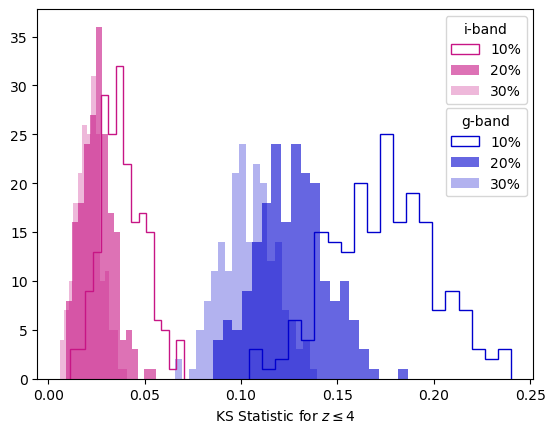

In [16]:
plt.hist(ks_i[0,:], bins=15, color='mediumvioletred', histtype='step')
plt.hist(ks_i[1,:], bins=15, color='mediumvioletred', alpha=0.6)
plt.hist(ks_i[2,:], bins=15, color='mediumvioletred', alpha=0.3)
legend1=plt.legend(['10%', '20%', '30%'], title='i-band')

plt.hist(ks_g[0,:], bins=20, label='10%', color='mediumblue', histtype='step')
plt.hist(ks_g[1,:], bins=20, label='20%', color='mediumblue', alpha=0.6)
plt.hist(ks_g[2,:], bins=20, label='30%', color='mediumblue', alpha=0.3)
plt.legend(title='g-band', bbox_to_anchor=[1,0.75])
plt.gca().add_artist(legend1)

plt.xlabel(r'KS Statistic for $z\leq4$')